<h3>Importing Required Packages</h3>

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
train_path = 'content/dataset/cnn/pneumonia_revamped/train'
test_path = 'content/dataset/cnn/pneumonia_revamped/test'
valid_path = 'content/dataset/cnn/pneumonia_revamped/val'
batch_size = 16
img_height = 500
img_width = 500

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
)
validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False  # Don't shuffle validation data
)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [50]:
train_X, train_y = next(train_generator)
validation_X, validation_y = next(validation_generator)

# Split test data into features and labels (assuming it's not a generator)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False  # Don't shuffle test data
)
test_X, test_y = next(test_generator)

Found 624 images belonging to 2 classes.


In [75]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X.reshape(-1, train_X.shape[1] * train_X.shape[2]))
validation_X_scaled = scaler.transform(validation_X.reshape(-1, validation_X.shape[1] * validation_X.shape[2]))
test_X_scaled = scaler.transform(test_X.reshape(-1, test_X.shape[1] * test_X.shape[2]))

# Train SVM model (linear kernel for simplicity)
svm_model = SVC(kernel='linear')  # Experimenting with different kernels 
svm_model.fit(train_X_scaled, train_y)

SVC(kernel='linear')

In [52]:
y_pred = svm_model.predict(validation_X_scaled)
print(classification_report(y_true=validation_y, y_pred=y_pred))
accuracy = accuracy_score(validation_y, y_pred)
print('Validation Accuracy:', accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        16
         1.0       0.00      0.00      0.00         0

    accuracy                           0.75        16
   macro avg       0.50      0.38      0.43        16
weighted avg       1.00      0.75      0.86        16

Validation Accuracy: 0.75


/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
test_pred = svm_model.predict(test_X_scaled)
print(classification_report(y_true=test_y, y_pred=test_pred))
test_accuracy = accuracy_score(test_y, test_pred)
print('Test Accuracy:', test_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        16
         1.0       0.00      0.00      0.00         0

    accuracy                           0.75        16
   macro avg       0.50      0.38      0.43        16
weighted avg       1.00      0.75      0.86        16

Test Accuracy: 0.75


/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vibhav/lung/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


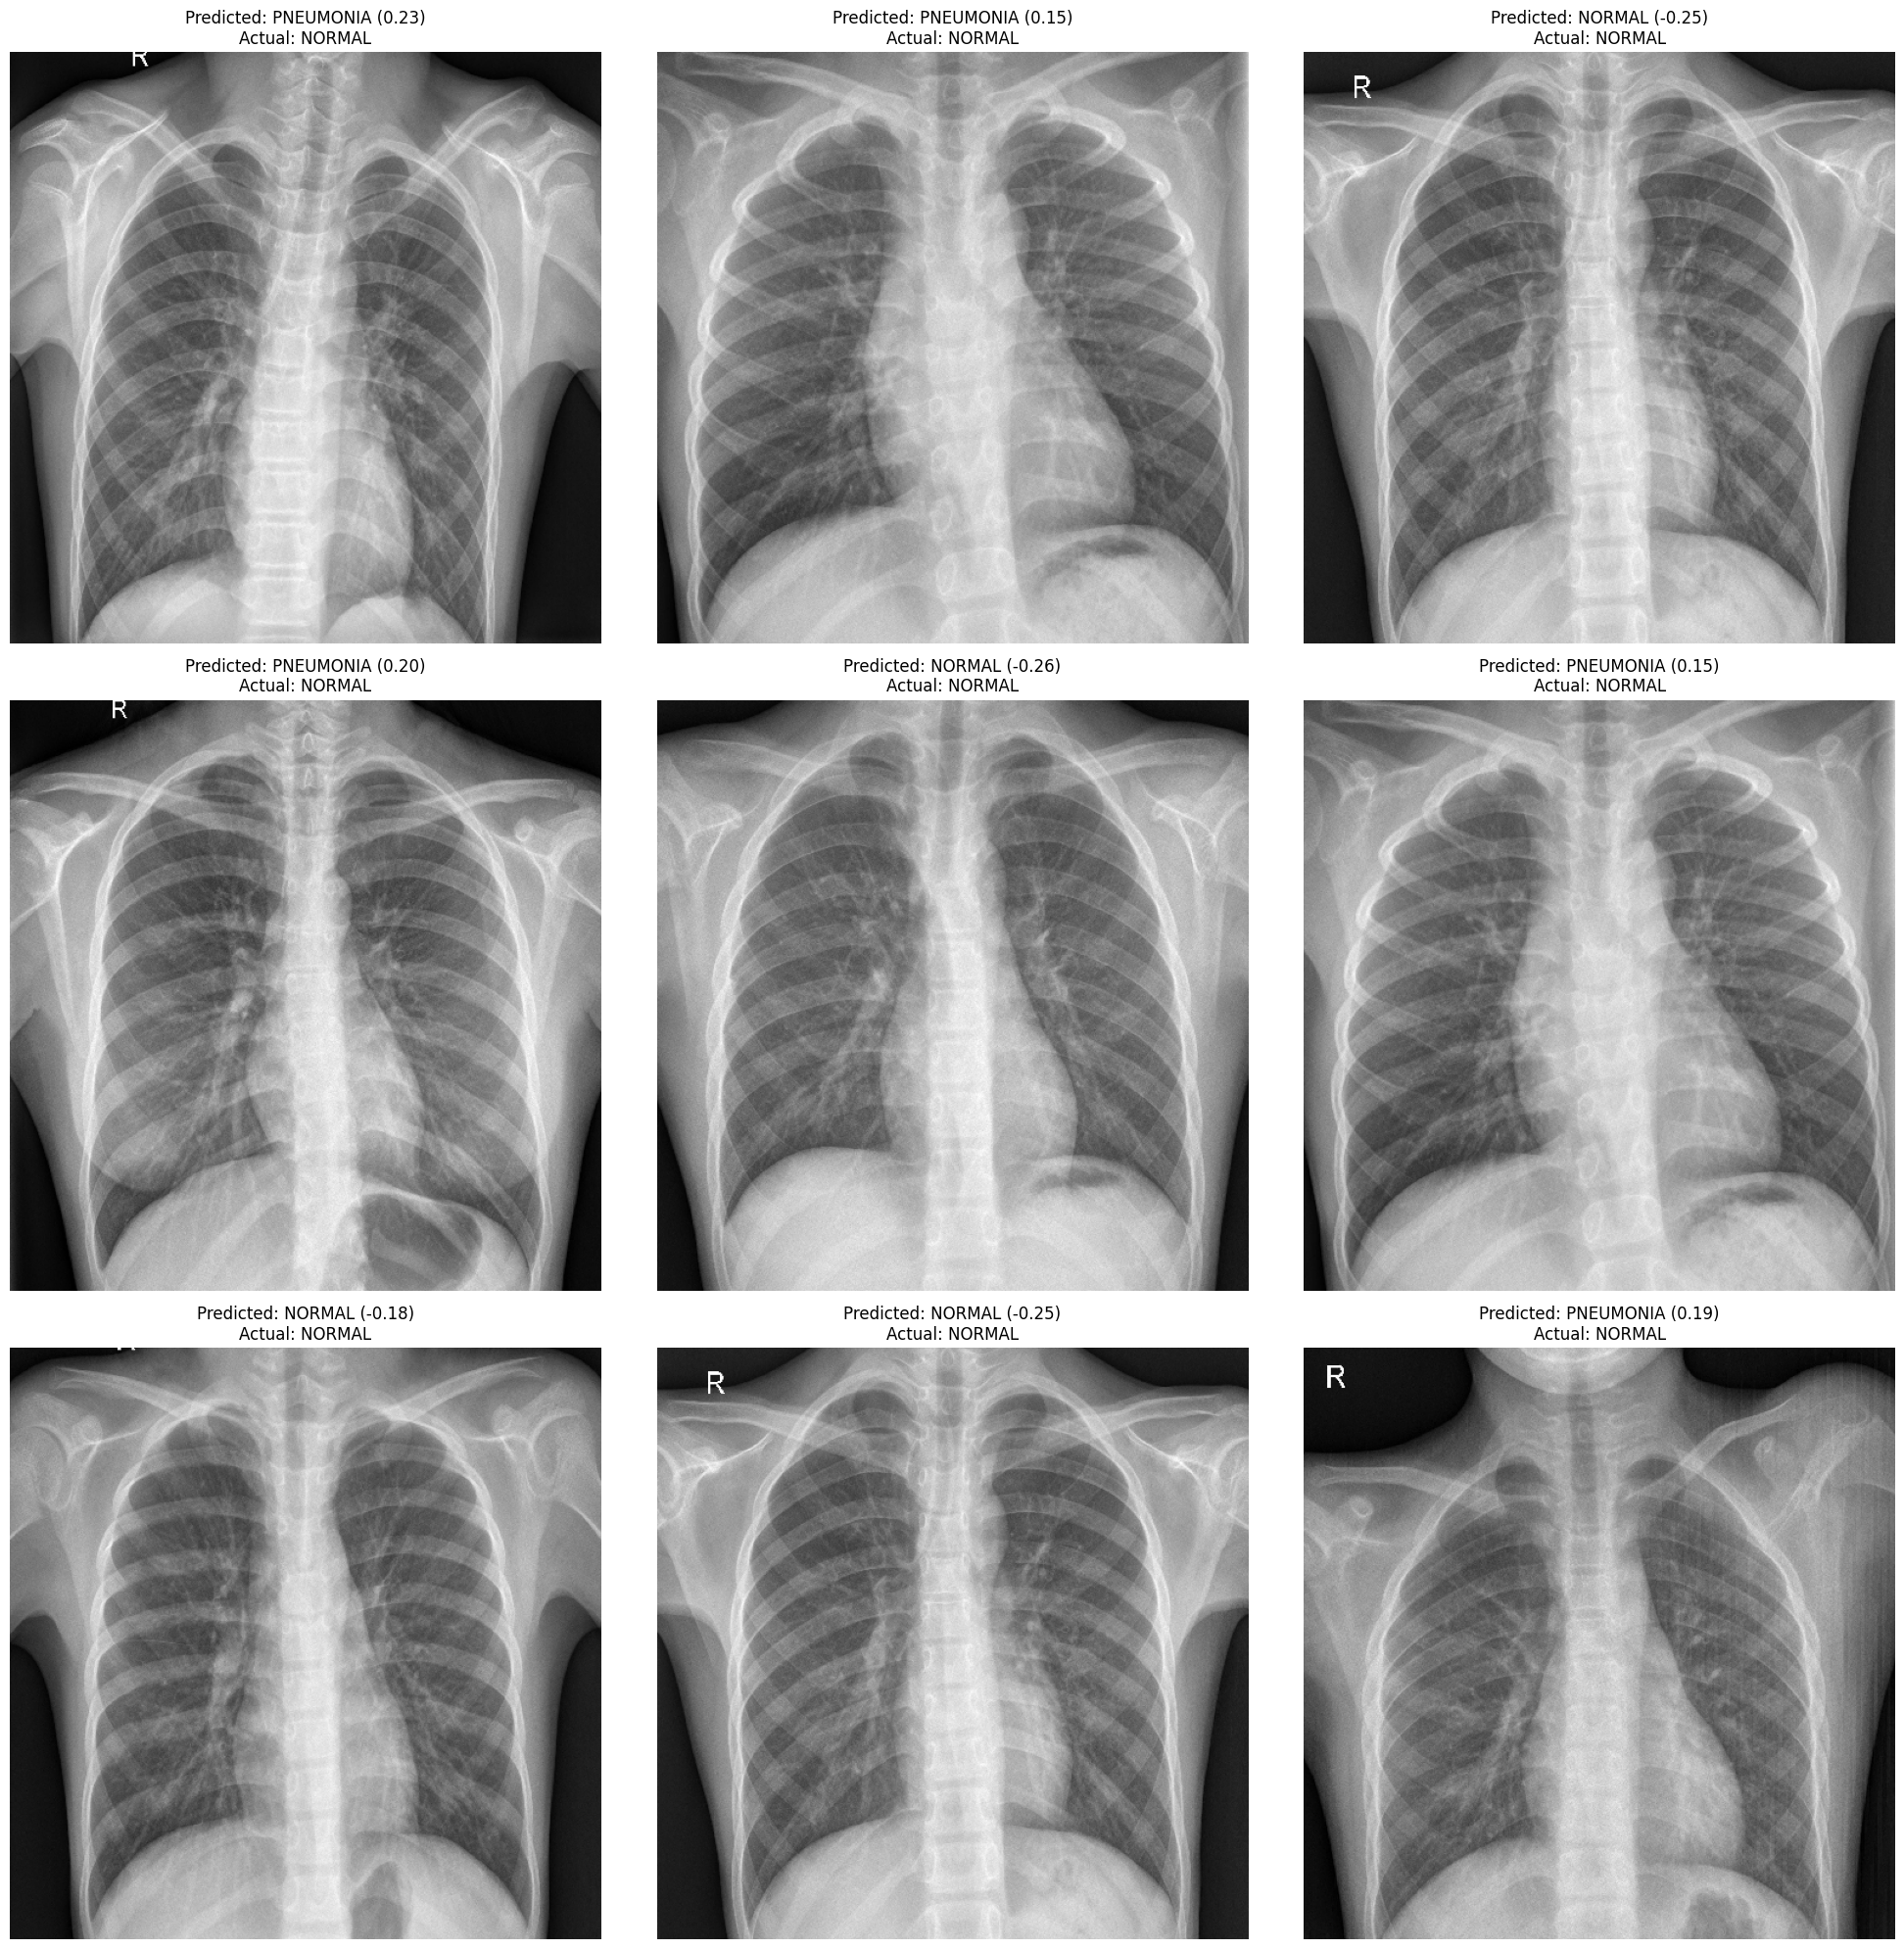

In [76]:
dic = {0: 'NORMAL', 1: 'PNEUMONIA'}
plt.figure(figsize=(20, 20))
for i in range(9):
    idx = np.random.randint(len(test_X))
    image = test_X[idx]
    true_label = dic[int(test_y[idx])]
    prob = svm_model.decision_function(test_X_scaled[idx].reshape(1, -1))[0]
    predicted_label = dic[int(test_pred[idx])]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted_label} ({prob:.2f})\nActual: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()